In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [2]:
data = pd.read_csv('./data/airline-passengers.csv')

In [3]:
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
print(data)

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432

[144 rows x 1 columns]


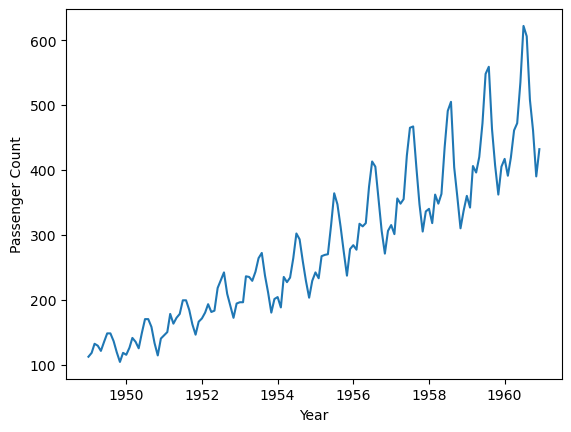

In [4]:
plt.plot(data)
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.show()

C:\Users\ljh29\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


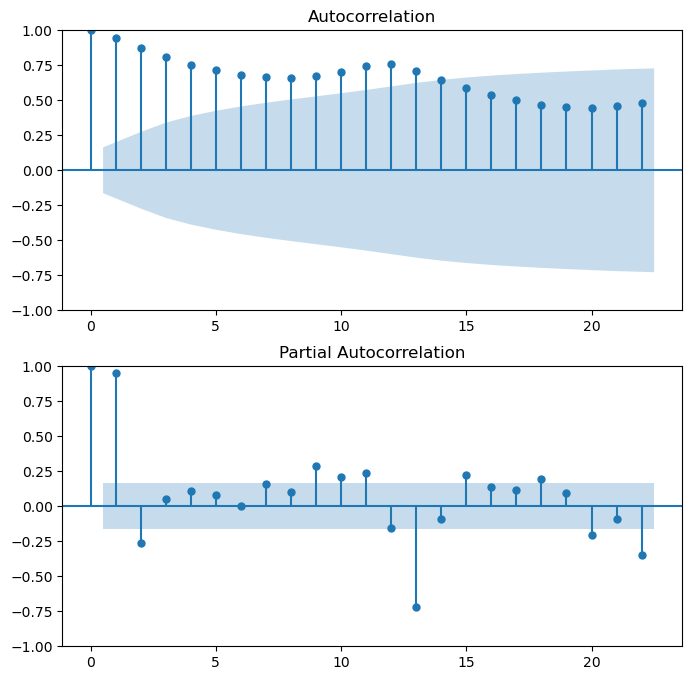

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))
plot_acf(data, ax=ax1)
plot_pacf(data, ax=ax2)
plt.show()

In [6]:
result = adfuller(data['Passengers'])
print('ADF Statistic', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

ADF Statistic 0.8153688792060597
p-value: 0.9918802434376411
Critical Values:
1%: -3.4816817173418295
5%: -2.8840418343195267
10%: -2.578770059171598


In [7]:
model = ARIMA(data, order=(2, 1, 2))
results = model.fit()

C:\Users\ljh29\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ljh29\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ljh29\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ljh29\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [8]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Tue, 25 Jul 2023   AIC                           1353.347
Time:                        14:17:53   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.060      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.819      0.0

In [9]:
pred = results.predict(start='1950-01-01', end='1961-12-01')
print(pred)

1950-01-01    121.156859
1950-02-01    120.594742
1950-03-01    132.840024
1950-04-01    146.351378
1950-05-01    137.425771
                 ...    
1961-08-01    539.729518
1961-09-01    508.528333
1961-10-01    478.147369
1961-11-01    456.747261
1961-12-01    449.696879
Freq: MS, Name: predicted_mean, Length: 144, dtype: float64


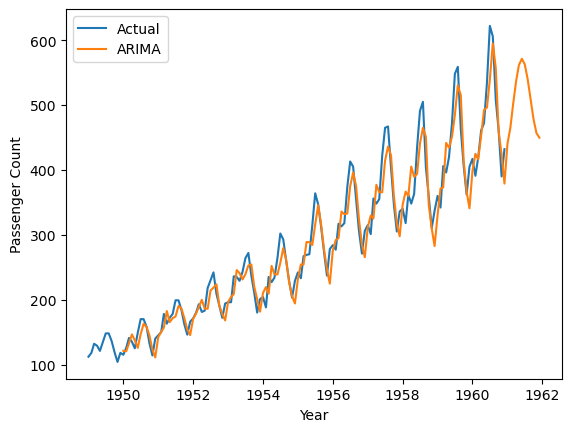

In [10]:
plt.plot(data, label='Actual')
plt.plot(pred, label='ARIMA')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()